In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [4]:
df = load_diabetes(as_frame = True).frame

In [5]:
df.shape

(442, 11)

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
# split data into input and output 
X = df.drop(columns = ["target"])
y = df["target"]

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

In [14]:
# Build Model 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
# Model Evaluation 
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MSE for training : ",mean_squared_error(y_train, y_pred_train))
print("MSE for testing : ",mean_squared_error(y_test, y_pred_test))

print("R2 for training : ",r2_score(y_train, y_pred_train))
print("R2 for testing : ",r2_score(y_test, y_pred_test))


MSE for training :  0.0
MSE for testing :  5153.224719101124
R2 for training :  1.0
R2 for testing :  0.027354261692495885


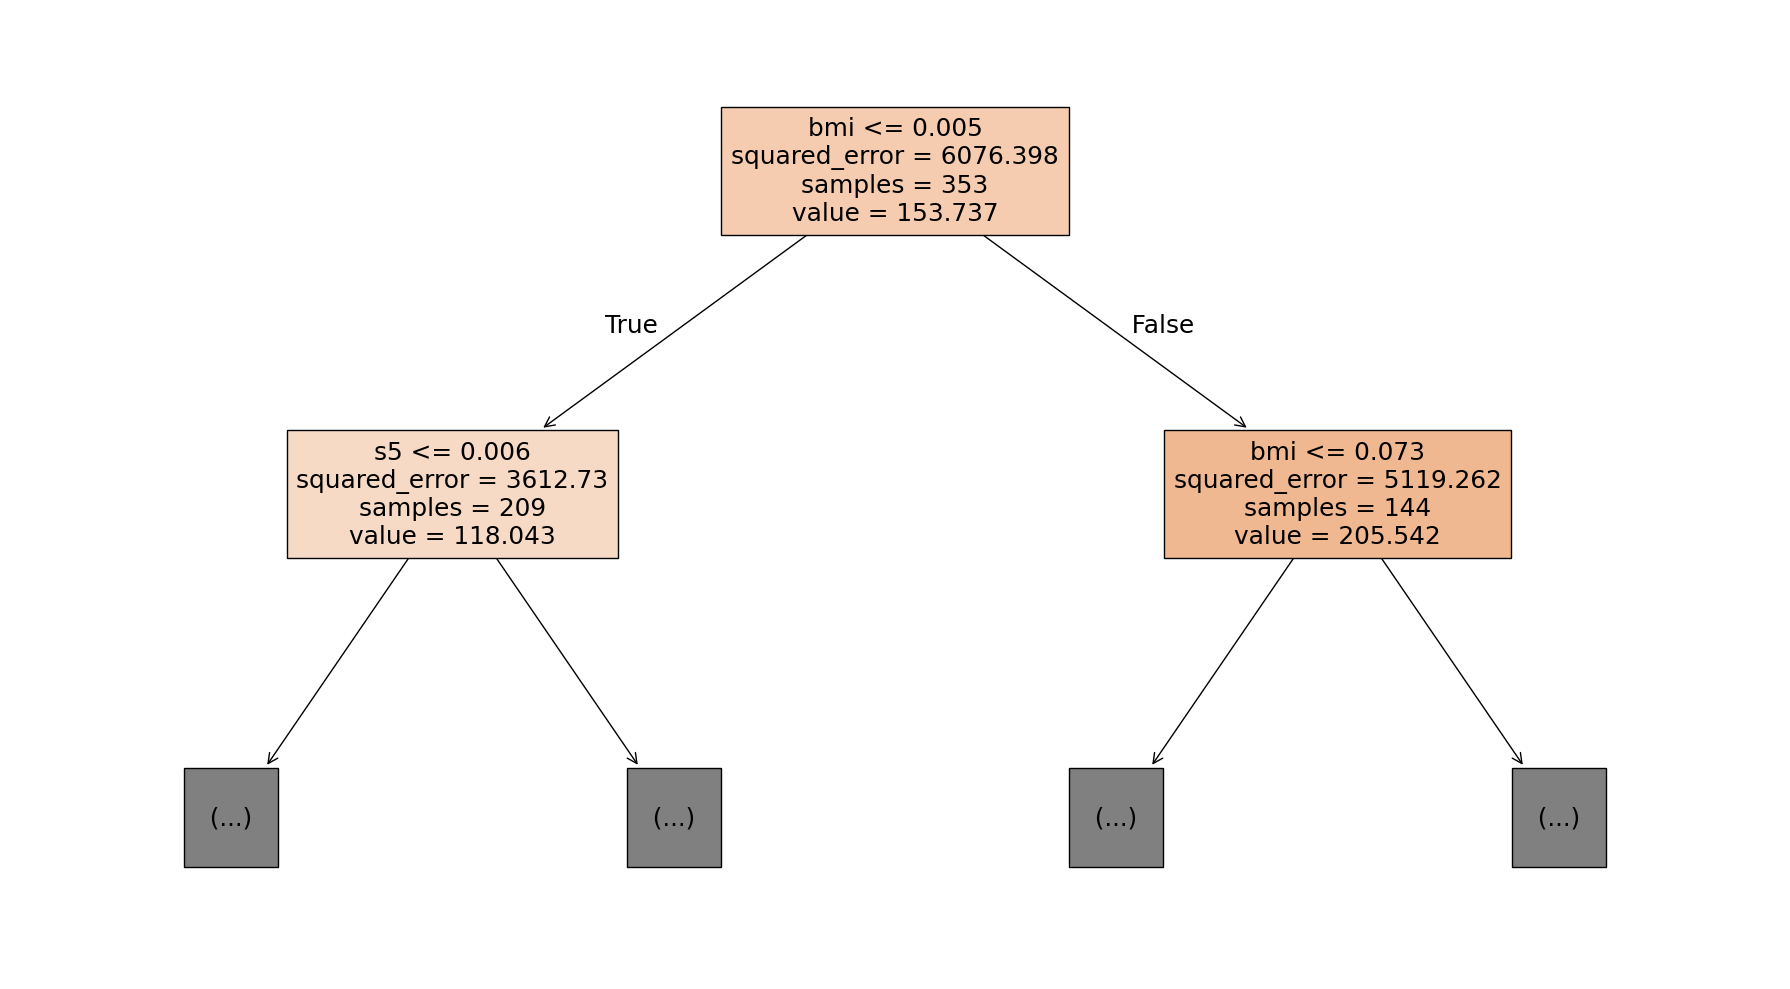

In [24]:
# lets plot tree
from sklearn.tree import plot_tree
plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    max_depth = 1
)
plt.tight_layout()
plt.show()

In [25]:
# MSE for training :  0.0
# MSE for testing :  5153.224719101124
# R2 for training :  1.0
# R2 for testing :  0.027354261692495885

# This show that our model is overfitted --> works very well in trained data but not on testing data

# We can either do pre-pruning or post-pruning, since we habe small  dataset and for the sake for ease now, we will we doinf pre-pruning


In [39]:
# Pre-Pruning to remove overfitting
# for Pre-Pruning, we can --
# define some max_depth

# Build Model with Pre-Pruning
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 10,min_samples_split=25,min_samples_leaf=35)
model.fit(X_train, y_train)

# Model Evaluation after Pre-Pruning
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("MSE for training : ",mean_squared_error(y_train, y_pred_train))
print("MSE for testing : ",mean_squared_error(y_test, y_pred_test))

print("R2 for training : ",r2_score(y_train, y_pred_train))
print("R2 for testing : ",r2_score(y_test, y_pred_test))



MSE for training :  3162.94857849065
MSE for testing :  3032.9419524105297
R2 for training :  0.4794698155499745
R2 for testing :  0.4275471718491821


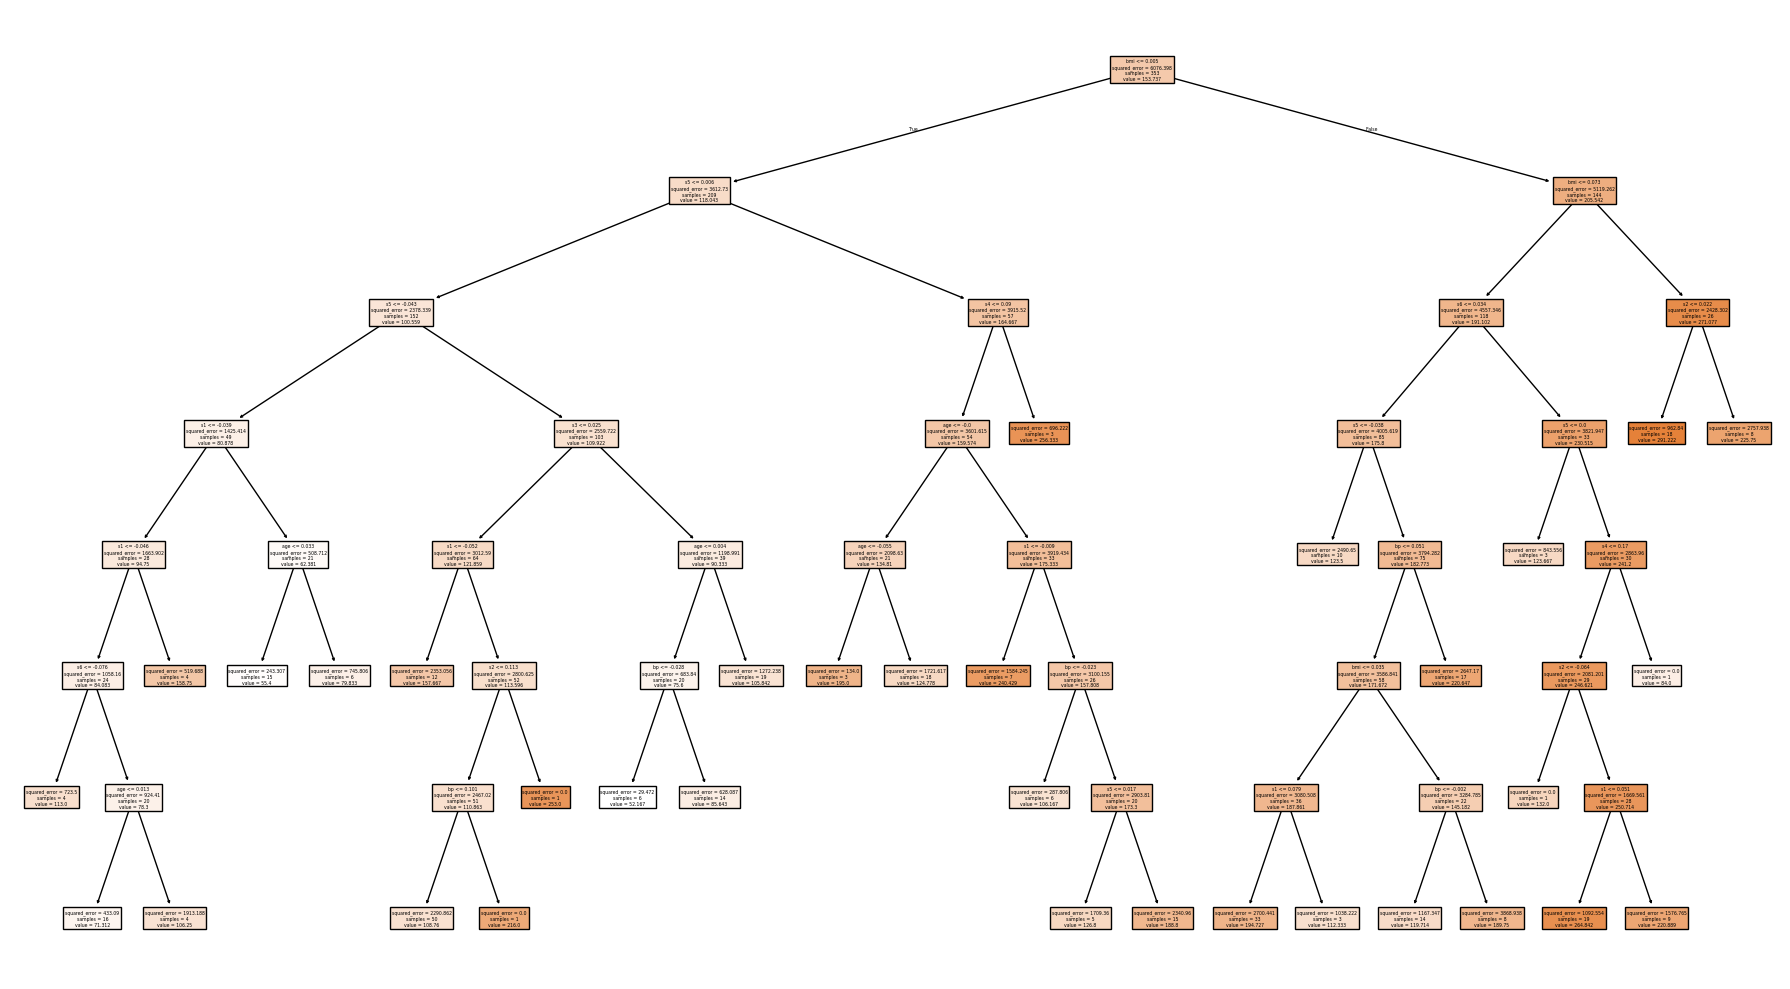

In [33]:
# lets plot tree after Pre-Pruning
from sklearn.tree import plot_tree
plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True
)
plt.tight_layout()
plt.show()